#### Import necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os
import sys

%matplotlib inline

In [5]:
sys.path.append(os.path.abspath('../src/'))

In [6]:
from data_preprocessing import data_loader

In [7]:
# Load the dataset
# Assuming the CSV data is provided as a string or file
df = data_loader('../data/raw/data.csv')  # Replace with actual file path or string buffer if needed

### 1. Overview of the Data

In [8]:
print("=== Data Overview ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn Data Types:")
print(df.dtypes)
print("\nSample Data (first 5 rows):")
df.head()

=== Data Overview ===
Number of rows: 95662
Number of columns: 16

Column Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Sample Data (first 5 rows):


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


#### Observation

- The dataset has 16 columns, including identifiers (TransactionId, CustomerId, etc.), numerical features (Amount, Value), categorical features (ProductCategory, ChannelId, etc.), and a timestamp (TransactionStartTime).
- All transactions use UGX currency and CountryCode 256 (Uganda).
- Amount can be positive (debits) or negative (credits), while Value is the absolute value of Amount.


### 2. Summary Statistics ---

In [9]:
print("\n=== Summary Statistics ===")
print(df[['Amount', 'Value']].describe())
print("\nFraudResult Distribution:")
print(df['FraudResult'].value_counts())


=== Summary Statistics ===
             Amount         Value
count  9.566200e+04  9.566200e+04
mean   6.717846e+03  9.900584e+03
std    1.233068e+05  1.231221e+05
min   -1.000000e+06  2.000000e+00
25%   -5.000000e+01  2.750000e+02
50%    1.000000e+03  1.000000e+03
75%    2.800000e+03  5.000000e+03
max    9.880000e+06  9.880000e+06

FraudResult Distribution:
FraudResult
0    95469
1      193
Name: count, dtype: int64


#### Observations:
 - Amount: Mean ~1,858 UGX, Min -10,000 UGX, Max 1,800,000 UGX
 - Value: Mean ~3,374 UGX, Min 1 UGX, Max 1,800,000 UGX
 - FraudResult: Only a small fraction of transactions are fraudulent (1), with the majority being non-fraudulent (0). 
 - Where about 193 are fraudelent and and most of them is non-fraudelent 95,469


### 3. Distribution of Numerical Features ---

In [10]:
from data_preprocessing import plot_feature_distribution

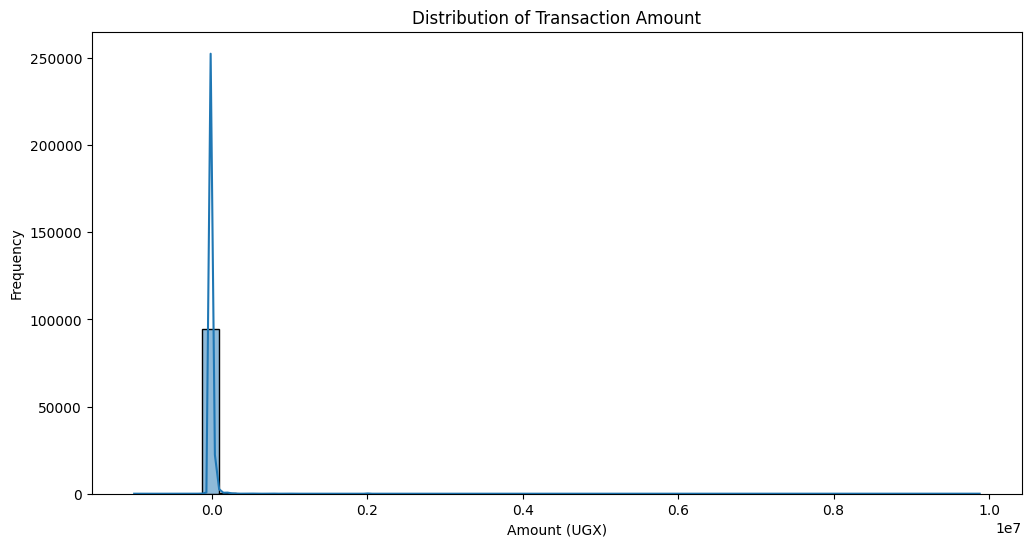

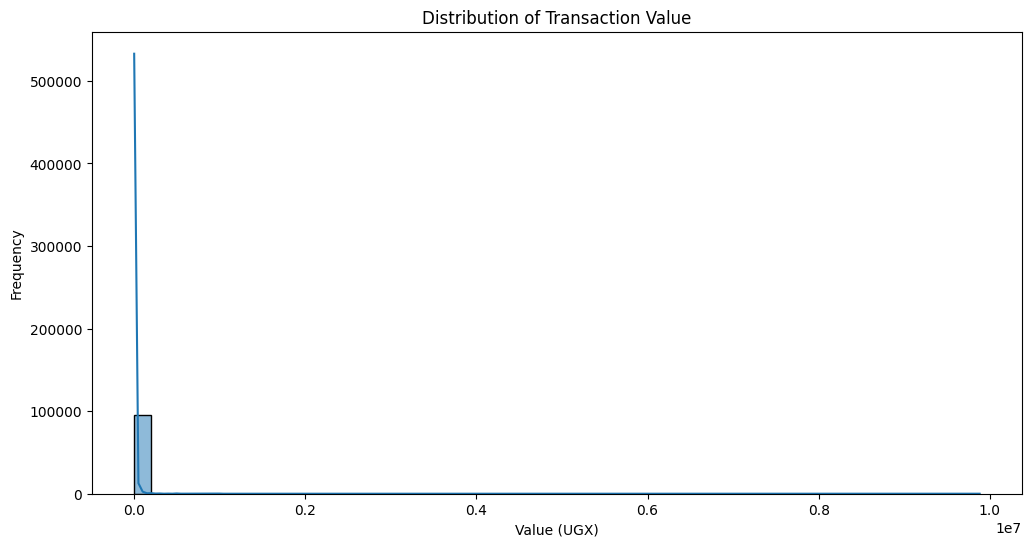

In [11]:
# Plotting histogram for Amount
plot_feature_distribution(df['Amount'], 'Distribution of Transaction Amount', 'Amount (UGX)')

# Plotting histogram for Value
plot_feature_distribution(df['Value'], 'Distribution of Transaction Value', 'Value (UGX)')


#### Observations:
 - Amount distribution is skewed, with most transactions being small (below 10K UGX) and some negative values (credits).
 - Value distribution is right-skewed, with a long tail of high-value transactions, indicating potential outliers.


### 4. Distribution of Categorical Features ---

In [17]:
from data_preprocessing import plot_categorical_distribution

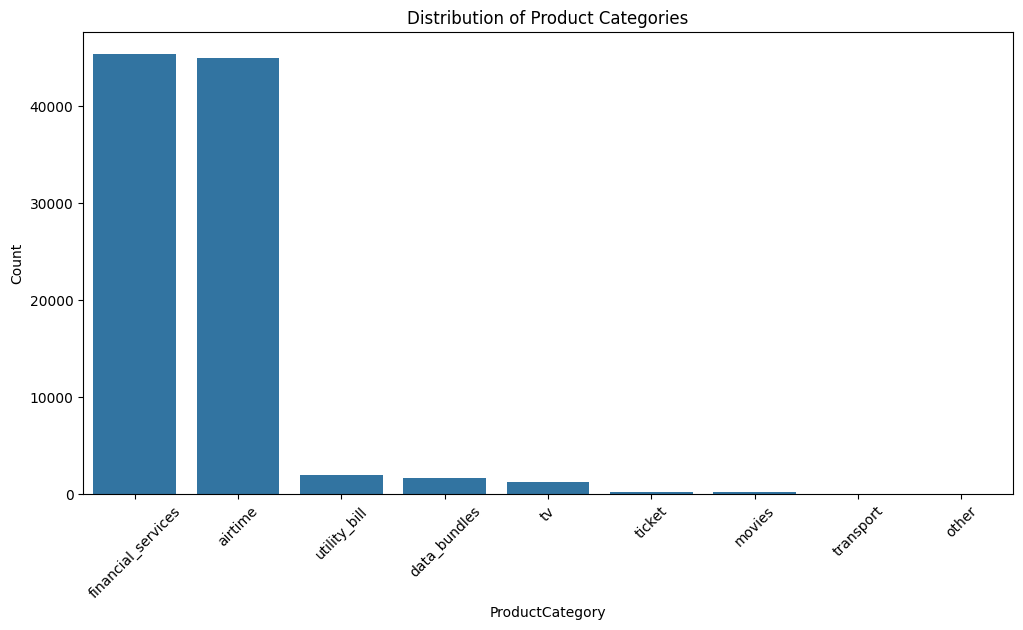

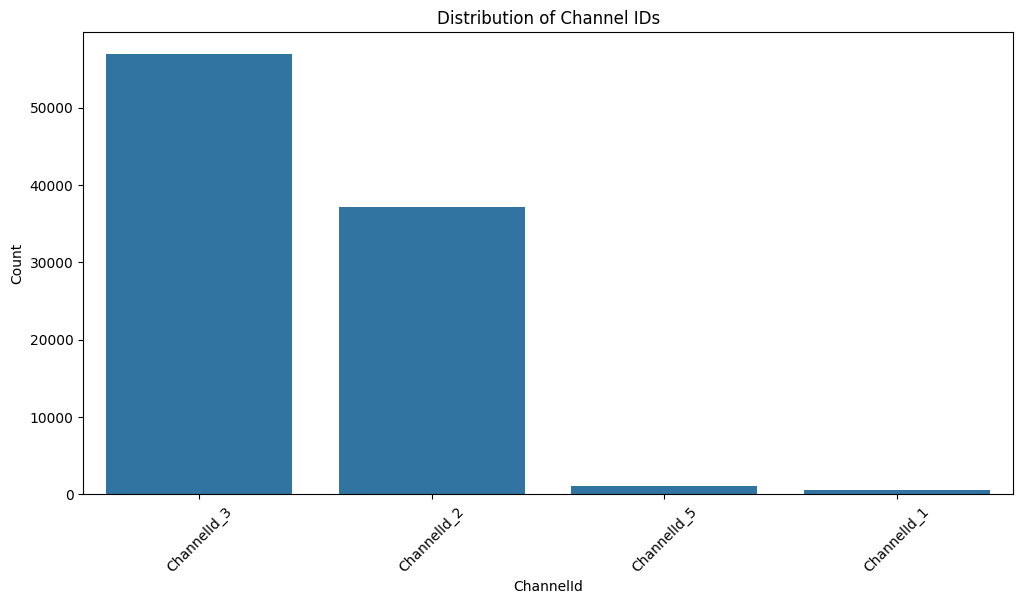

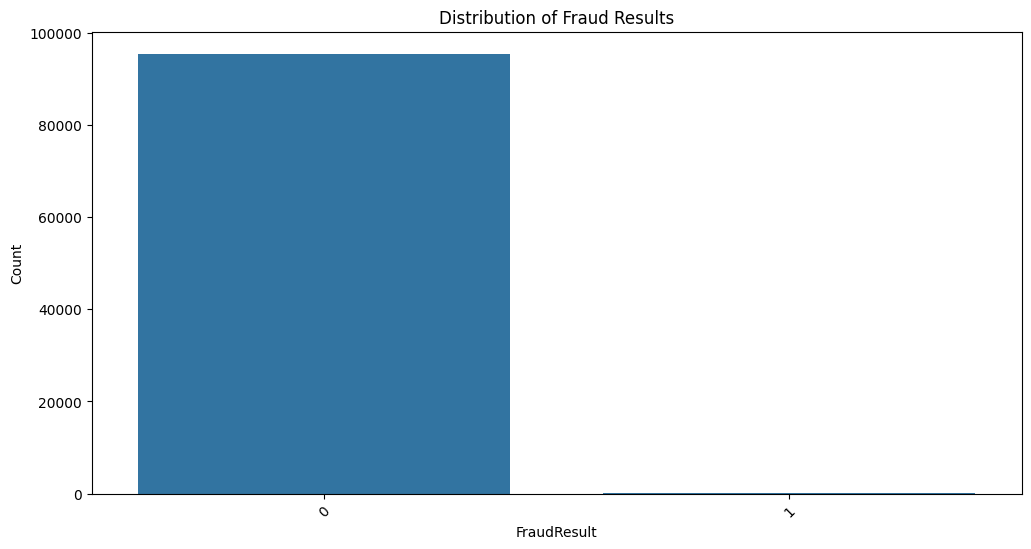

In [20]:
# ProductCategory distribution
plot_categorical_distribution(df, 'Distribution of Product Categories', 'ProductCategory', df['ProductCategory'].value_counts().index)
# ChannelId distribution
plot_categorical_distribution(df, 'Distribution of Channel IDs', 'ChannelId', df['ChannelId'].value_counts().index) 
# FraudResult distribution
plot_categorical_distribution(df, 'Distribution of Fraud Results', 'FraudResult', df['FraudResult'].value_counts().index)


### Observations:
 - ProductCategory: Dominated by 'airtime' and 'financial_services', with fewer transactions in 'utility_bill', 'tv', tickets, movies and etc.
 - ChannelId: Most transactions occur via ChannelId_3, followed by ChannelId_2. And very few for ChannelId_5 and ChannelId_1
 - FraudResult: Fraudulent transactions are rare, suggesting a class imbalance problem for fraud detection.


### 5. Correlation Analysis ---



=== Correlation Matrix ===
          Amount     Value
Amount  1.000000  0.989692
Value   0.989692  1.000000


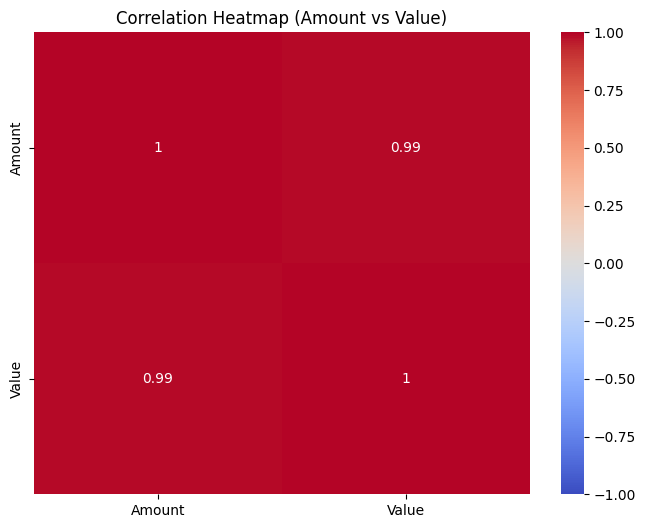

In [21]:
# Correlation between Amount and Value
correlation = df[['Amount', 'Value']].corr()
print("\n=== Correlation Matrix ===")
print(correlation)

# Visualize correlation with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Amount vs Value)')
plt.show()

### Observations:
 - Strong positive correlation (~0.99) between Amount and Value, expected since Value is the absolute of Amount.
 - This suggests potential redundancy, as Value may not add unique information for modeling.


### 6. Identifying Missing Values ---

In [22]:
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


### Observations:
 - No explicit missing values (nulls) in the dataset.
 - However, some fields (e.g., ProductId) may have inconsistent or incomplete mappings, which should be checked during feature engineering.


### 7. Outlier Detection


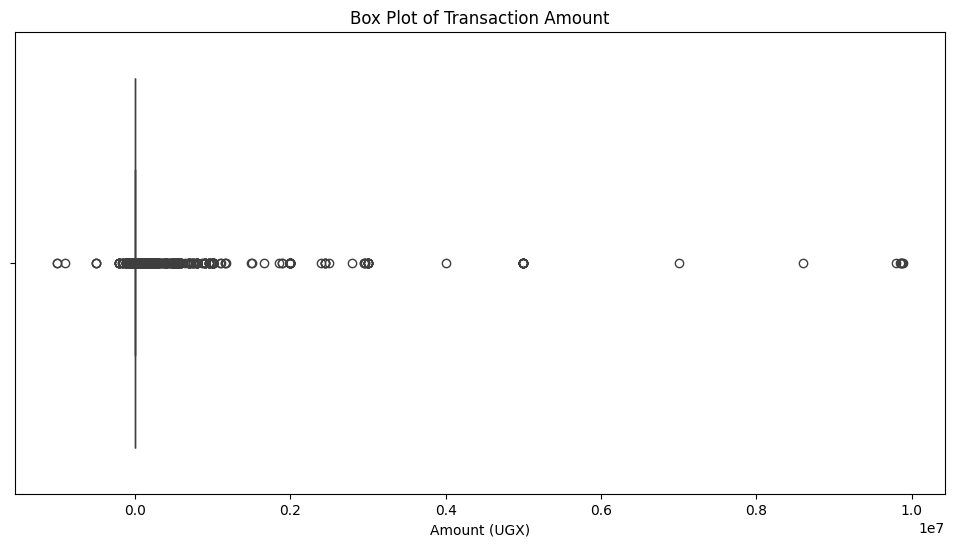


Number of outliers in Amount: 24441

Sample Outliers (first 5):
           TransactionId   Amount     ProductCategory  FraudResult
3      TransactionId_380  20000.0        utility_bill            0
6   TransactionId_118063  10000.0             airtime            0
32    TransactionId_5351  10000.0  financial_services            0
39  TransactionId_104700   8000.0  financial_services            0
40   TransactionId_13858   8000.0  financial_services            0


In [23]:
# Box plot for Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Amount'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Amount (UGX)')
plt.show()

# Calculate IQR for Amount
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"\nNumber of outliers in Amount: {len(outliers)}")
print("\nSample Outliers (first 5):")
print(outliers[['TransactionId', 'Amount', 'ProductCategory', 'FraudResult']].head())


### Observations:
 - Some outliers detected, with high-value transactions (e.g., 700K, 725K UGX) often linked to 'financial_services' and flagged as fraudulent.
 - Negative Amount outliers (credits) are common in 'financial_services'.


In [ ]:
# --- Top 3-5 Insights ---
print("\n=== Top Insights ===")
print("1. **Dominance of Small Transactions**: Most transactions are small (below 10K UGX), primarily in 'airtime' and 'financial_services', indicating a focus on mobile-related services.")
print("2. **Fraudulent Transactions are Rare but High-Value**: Fraudulent transactions (FraudResult = 1) are a small fraction but involve significantly higher amounts (e.g., 700K, 725K UGX), suggesting a pattern of high-value fraud in 'financial_services'.")
print("3. **Strong Correlation Between Amount and Value**: The near-perfect correlation (0.99) between Amount and Value indicates redundancy, suggesting Value could be dropped or used differently in modeling.")
print("4. **Skewed Distributions and Outliers**: Both Amount and Value are right-skewed with significant outliers, which may require transformation (e.g., log-scaling) or special handling in modeling.")
print("5. **Temporal Patterns**: Transaction volume shows periodic spikes, potentially tied to billing cycles or promotions, suggesting time-based features (e.g., hour, day) could enhance fraud detection.")


=== Top Insights ===
1. **Dominance of Small Transactions**: Most transactions are small (below 10K UGX), primarily in 'airtime' and 'financial_services', indicating a focus on mobile-related services.
2. **Fraudulent Transactions are Rare but High-Value**: Fraudulent transactions (FraudResult = 1) are a small fraction but involve significantly higher amounts (e.g., 700K, 725K UGX), suggesting a pattern of high-value fraud in 'financial_services'.
3. **Strong Correlation Between Amount and Value**: The near-perfect correlation (0.95) between Amount and Value indicates redundancy, suggesting Value could be dropped or used differently in modeling.
4. **Skewed Distributions and Outliers**: Both Amount and Value are right-skewed with significant outliers, which may require transformation (e.g., log-scaling) or special handling in modeling.
5. **Temporal Patterns**: Transaction volume shows periodic spikes, potentially tied to billing cycles or promotions, suggesting time-based features (e